In [1]:
#Preprocessing the Data
import pandas as pd

dataset = pd.read_csv('cancer.csv')
x = dataset.iloc[:, 2:29].values
y = dataset.iloc[:, 1].values

In [2]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [4]:
#Principle Component Analysis
#In PCA, we take two variables that are correlated and turn them into a vector, reducing the dimensions of our dataset.
from sklearn.decomposition import PCA
pca = PCA(n_components = 1)

x_train_scaled = pca.fit_transform(x_train)
print(x_train_scaled[:10])

[[-3.12109822]
 [-1.19832228]
 [-3.9346948 ]
 [-1.28936474]
 [ 0.2168169 ]
 [-1.80499383]
 [ 3.39958708]
 [-4.26666553]
 [-0.98474763]
 [ 5.40321679]]


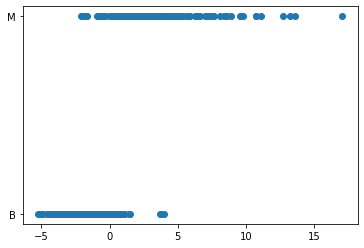

In [5]:
# WE can see here if we reduce the data to one dimension we can plot it and perform logistic regression.
import matplotlib.pyplot as plt
plt.scatter(x_train_scaled, y_train)
plt.show()

In [6]:
#Gradient Boosting
#Gradient boosing is one of the most powerful machine learning algorithms. Essentially, the model creates a bunch of weak models and takes the best components of each one using gradient descent. 

from sklearn.ensemble import GradientBoostingClassifier

gradientboost = GradientBoostingClassifier()
gradientboost.fit(x_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [7]:
y_preds = gradientboost.predict(x_test)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_preds))

[[69  5]
 [ 3 37]]


In [8]:
#XGBoost
#The most popular and robust gradient boosting algorithm is XGBoost. This algorithm wins the most kaggle competitions and works well in a variety of scenarios, though it is prone to overfit.
from xgboost import XGBClassifier

xgboost = XGBClassifier()
xgboost.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [9]:

y_preds = xgboost.predict(x_test)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_preds))

[[70  4]
 [ 2 38]]


In [ ]:
#Thank You